<a href="https://colab.research.google.com/github/Sasidhar0709/Project-Stock-market-Analysis/blob/main/Project_Final_21063192.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stock market Prediction


In [ ]:
#!pip install yfinance

In [ ]:
#!pip install fancyimpute

In [ ]:
!pip install finta

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf
from scipy.interpolate import interp1d
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from finta import TA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

Download Data for train

In [ ]:
ftse100_tickers = [
    'BARC.L','LLOY.L', 'NWG.L', 'HSBA.L', 'STAN.L', 'PRU.L', 'PHNX.L',
    'AZN.L', 'CRDA.L','GSK.L','HIK.L', 'SN.L',
    'JD.L','MKS.L', 'NXT.L', 'SBRY.L', 'TSCO.L',
   ]

start_date = '2013-01-01'
end_date = '2023-12-31'

stocks_data = {}

for ticker in ftse100_tickers:
    print(f"Fetching data for {ticker}...")
    data = yf.download(ticker, start=start_date, end=end_date)
    stocks_data[ticker] = data

for ticker, data in stocks_data.items():
    data.to_csv(f'{ticker}_stock_data_train.csv')
    print(f"Data for {ticker} saved to {ticker}_stock_data_train.csv")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Fetching data for BARC.L...
Fetching data for LLOY.L...
Fetching data for NWG.L...
Fetching data for HSBA.L...



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetching data for STAN.L...
Fetching data for PRU.L...
Fetching data for PHNX.L...
Fetching data for AZN.L...
Fetching data for CRDA.L...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Fetching data for GSK.L...
Fetching data for HIK.L...
Fetching data for SN.L...
Fetching data for JD.L...



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetching data for MKS.L...
Fetching data for NXT.L...
Fetching data for SBRY.L...
Fetching data for TSCO.L...
Data for BARC.L saved to BARC.L_stock_data_train.csv
Data for LLOY.L saved to LLOY.L_stock_data_train.csv
Data for NWG.L saved to NWG.L_stock_data_train.csv
Data for HSBA.L saved to HSBA.L_stock_data_train.csv
Data for STAN.L saved to STAN.L_stock_data_train.csv
Data for PRU.L saved to PRU.L_stock_data_train.csv
Data for PHNX.L saved to PHNX.L_stock_data_train.csv
Data for AZN.L saved to AZN.L_stock_data_train.csv
Data for CRDA.L saved to CRDA.L_stock_data_train.csv
Data for GSK.L saved to GSK.L_stock_data_train.csv
Data for HIK.L saved to HIK.L_stock_data_train.csv
Data for SN.L saved to SN.L_stock_data_train.csv
Data for JD.L saved to JD.L_stock_data_train.csv
Data for MKS.L saved to MKS.L_stock_data_train.csv
Data for NXT.L saved to NXT.L_stock_data_train.csv
Data for SBRY.L saved to SBRY.L_stock_data_train.csv
Data for TSCO.L saved to TSCO.L_stock_data_train.csv


Download data for Test

In [ ]:
ftse100_tickers = [
    'BARC.L','LLOY.L', 'NWG.L', 'HSBA.L', 'STAN.L', 'PRU.L', 'PHNX.L',
    'AZN.L', 'CRDA.L','GSK.L','HIK.L', 'SN.L',
    'JD.L','MKS.L', 'NXT.L', 'SBRY.L', 'TSCO.L',
   ]

start_date = '2023-01-01'
end_date = '2024-06-30'

stocks_data = {}

for ticker in ftse100_tickers:
    print(f"Fetching data for {ticker}...")
    data = yf.download(ticker, start=start_date, end=end_date)
    stocks_data[ticker] = data

for ticker, data in stocks_data.items():
    data.to_csv(f'{ticker}_stock_data_test.csv')
    print(f"Data for {ticker} saved to {ticker}_stock_data_test.csv")


[*********************100%%**********************]  1 of 1 completed

Fetching data for BARC.L...
Fetching data for LLOY.L...



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Fetching data for NWG.L...
Fetching data for HSBA.L...
Fetching data for STAN.L...
Fetching data for PRU.L...
Fetching data for PHNX.L...
Fetching data for AZN.L...
Fetching data for CRDA.L...



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetching data for GSK.L...
Fetching data for HIK.L...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetching data for SN.L...
Fetching data for JD.L...
Fetching data for MKS.L...
Fetching data for NXT.L...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetching data for SBRY.L...
Fetching data for TSCO.L...


[*********************100%%**********************]  1 of 1 completed


Data for BARC.L saved to BARC.L_stock_data_test.csv
Data for LLOY.L saved to LLOY.L_stock_data_test.csv
Data for NWG.L saved to NWG.L_stock_data_test.csv
Data for HSBA.L saved to HSBA.L_stock_data_test.csv
Data for STAN.L saved to STAN.L_stock_data_test.csv
Data for PRU.L saved to PRU.L_stock_data_test.csv
Data for PHNX.L saved to PHNX.L_stock_data_test.csv
Data for AZN.L saved to AZN.L_stock_data_test.csv
Data for CRDA.L saved to CRDA.L_stock_data_test.csv
Data for GSK.L saved to GSK.L_stock_data_test.csv
Data for HIK.L saved to HIK.L_stock_data_test.csv
Data for SN.L saved to SN.L_stock_data_test.csv
Data for JD.L saved to JD.L_stock_data_test.csv
Data for MKS.L saved to MKS.L_stock_data_test.csv
Data for NXT.L saved to NXT.L_stock_data_test.csv
Data for SBRY.L saved to SBRY.L_stock_data_test.csv
Data for TSCO.L saved to TSCO.L_stock_data_test.csv


In [ ]:
barclays_train = pd.read_csv('BARC.L_stock_data_train.csv')
lloyds_train = pd.read_csv('LLOY.L_stock_data_train.csv')
natwest_train = pd.read_csv('NWG.L_stock_data_train.csv')
hsbc_train = pd.read_csv('HSBA.L_stock_data_train.csv')
stand_chartered_train = pd.read_csv('STAN.L_stock_data_train.csv')
prudential_train = pd.read_csv('PRU.L_stock_data_train.csv')
phoenix_train = pd.read_csv('PHNX.L_stock_data_train.csv')

In [ ]:
barclays_test = pd.read_csv('BARC.L_stock_data_test.csv')
lloyds_test = pd.read_csv('LLOY.L_stock_data_test.csv')
natwest_test = pd.read_csv('NWG.L_stock_data_test.csv')
hsbc_test = pd.read_csv('HSBA.L_stock_data_test.csv')
stand_chartered_test = pd.read_csv('STAN.L_stock_data_test.csv')
prudential_test = pd.read_csv('PRU.L_stock_data_test.csv')
phoenix_test = pd.read_csv('PHNX.L_stock_data_test.csv')

In [ ]:
banks_train = [barclays_train,lloyds_train,natwest_train,hsbc_train,stand_chartered_train,prudential_train,phoenix_train]
banks_test = [barclays_test,lloyds_test,natwest_test,hsbc_test,stand_chartered_test,prudential_test,phoenix_test]

In [ ]:
barclays_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2777 entries, 0 to 2776
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2777 non-null   object 
 1   Open       2777 non-null   float64
 2   High       2777 non-null   float64
 3   Low        2777 non-null   float64
 4   Close      2777 non-null   float64
 5   Adj Close  2777 non-null   float64
 6   Volume     2777 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 152.0+ KB


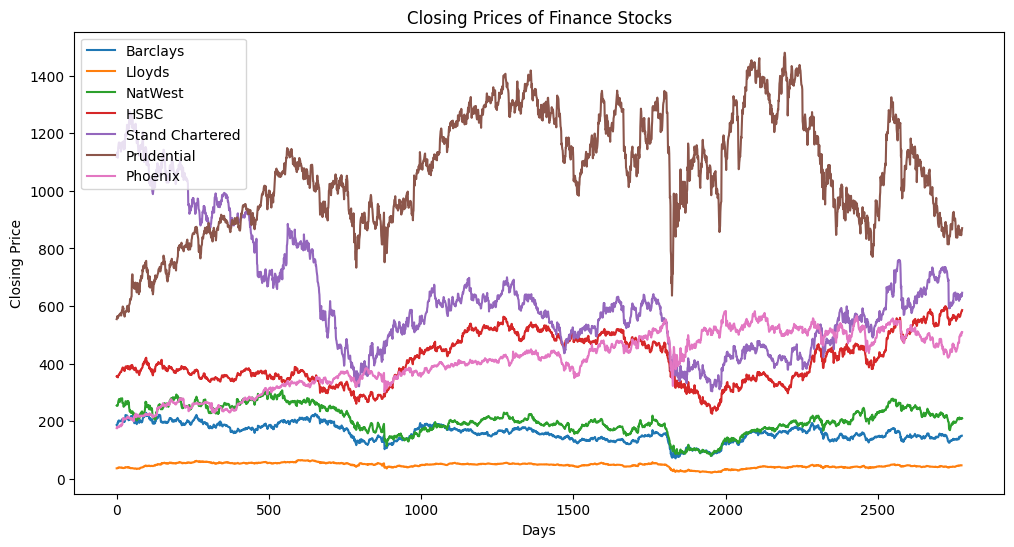

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(barclays_train['Adj Close'],label='Barclays')
plt.plot(lloyds_train['Adj Close'],label='Lloyds')
plt.plot(natwest_train['Adj Close'],label='NatWest')
plt.plot(hsbc_train['Adj Close'],label='HSBC')
plt.plot(stand_chartered_train['Adj Close'],label='Stand Chartered')
plt.plot(prudential_train['Adj Close'],label='Prudential')
plt.plot(phoenix_train['Adj Close'],label='Phoenix')
plt.title('Closing Prices of Finance Stocks')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(loc='upper left')
plt.show()

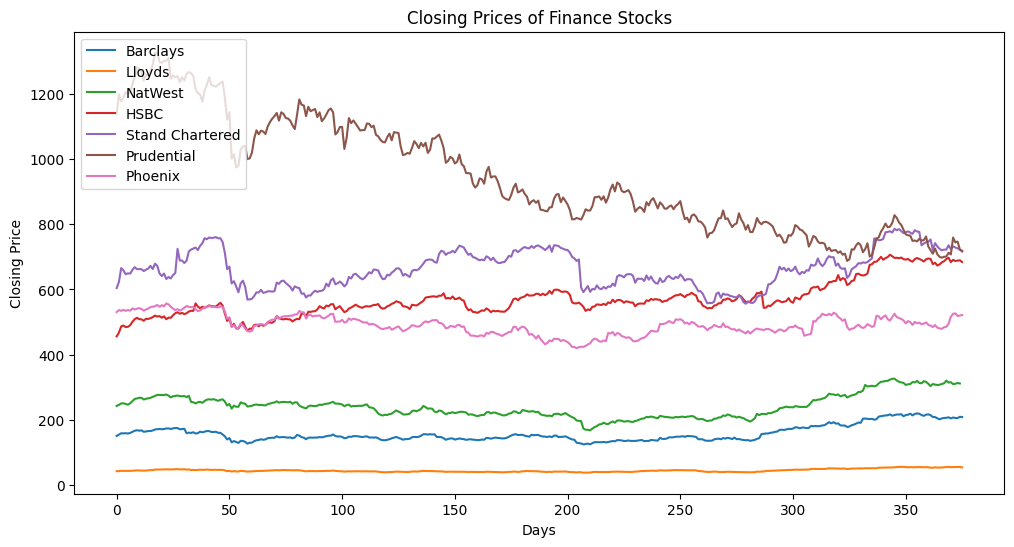

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(barclays_test['Adj Close'],label='Barclays')
plt.plot(lloyds_test['Adj Close'],label='Lloyds')
plt.plot(natwest_test['Adj Close'],label='NatWest')
plt.plot(hsbc_test['Adj Close'],label='HSBC')
plt.plot(stand_chartered_test['Adj Close'],label='Stand Chartered')
plt.plot(prudential_test['Adj Close'],label='Prudential')
plt.plot(phoenix_test['Adj Close'],label='Phoenix')
plt.title('Closing Prices of Finance Stocks')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(loc='upper left')
plt.show()

In [ ]:
barclays_train['Date'] = pd.to_datetime(barclays_train['Date'])

In [ ]:
barclays_train['Month'] = barclays_train['Date'].dt.month
avg= barclays_train['Volume'].groupby(barclays_train['Month']).mean()
#barclays.head()
avg

Month
1     4.316465e+07
2     5.252026e+07
3     6.661021e+07
4     5.727651e+07
5     4.829611e+07
6     4.812282e+07
7     4.336654e+07
8     4.287556e+07
9     4.510675e+07
10    4.916921e+07
11    4.455784e+07
12    4.409628e+07
Name: Volume, dtype: float64

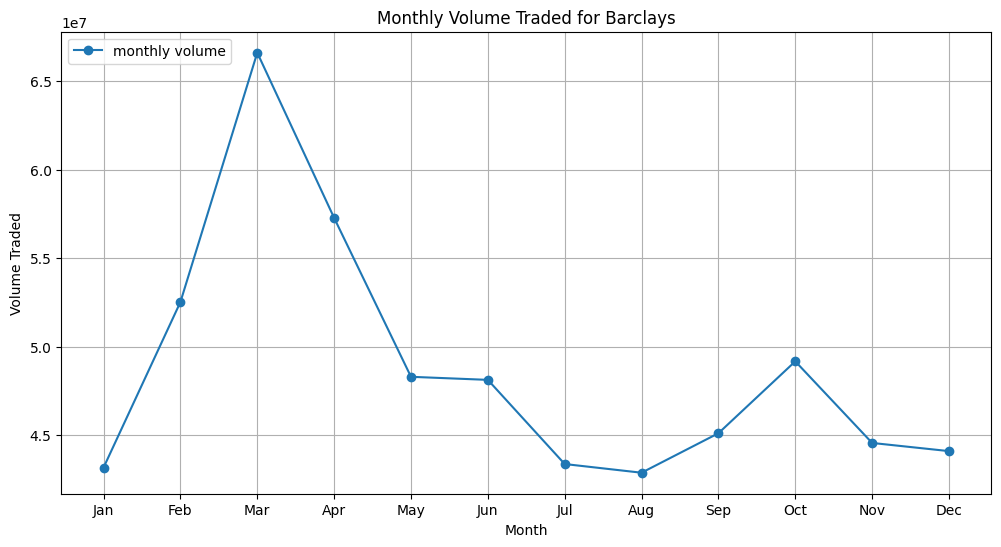

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(avg,label='monthly volume', marker='o', linestyle='-')
plt.title('Monthly Volume Traded for Barclays')
plt.xlabel('Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Volume Traded')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

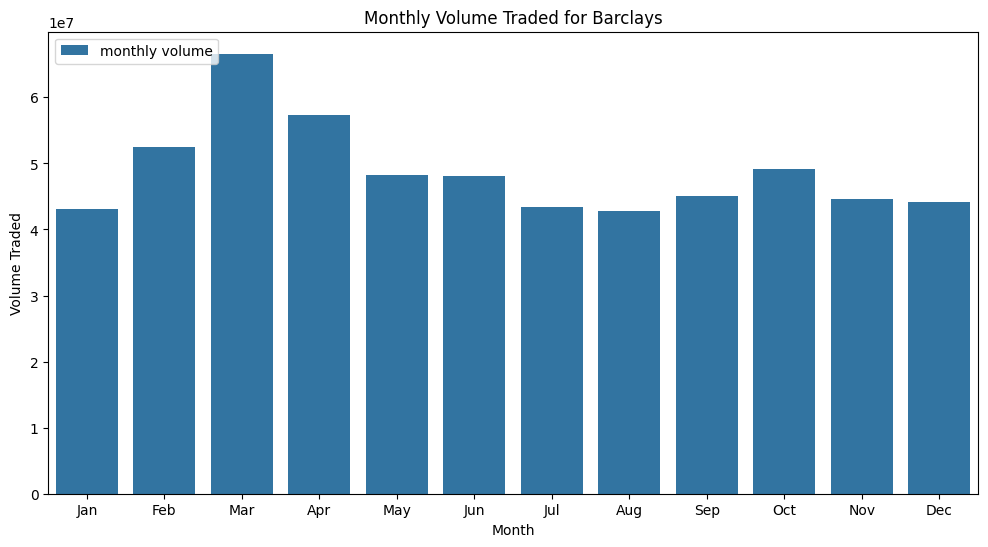

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(avg,label='monthly volume')
plt.title('Monthly Volume Traded for Barclays')
plt.xlabel('Month')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Volume Traded')
plt.legend(loc='upper left')
plt.show()

In [ ]:
barclays_train.drop(columns=['Month'])

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,252.043701,255.953903,249.041595,254.584000,186.024307,64045957
1,2013-01-03,253.706497,257.622192,252.026199,254.953506,186.294342,30629942
2,2013-01-04,254.168304,257.318298,252.644196,255.600204,186.766891,33872755
3,2013-01-07,259.572296,266.466187,254.990494,265.299500,193.854156,66102672
4,2013-01-08,263.821503,272.943512,260.957886,265.299500,193.854156,53437482
...,...,...,...,...,...,...,...
2772,2023-12-21,150.039993,152.559998,148.880005,151.419998,146.668518,55268216
2773,2023-12-22,149.899994,152.080002,149.880005,151.779999,147.017212,13070297
2774,2023-12-27,152.600006,154.720001,150.860001,153.660004,148.838226,26184336
2775,2023-12-28,153.460007,154.039993,152.800003,153.500000,148.683243,21442794


In [ ]:
for company in banks_train:
  company.drop(columns=['Date'],inplace=True)
  company['SMA_20'] = TA.SMA(company,20)
  company['SMA_50'] = TA.SMA(company, 50)
  company['RSI_14'] = TA.RSI(company, 14)
  macd = TA.MACD(company)
  company['MACD'] = macd['MACD']
  company['MACD_SIGNAL'] = macd['SIGNAL']
  #print(company.head())



In [ ]:
barclays_train.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Month',
       'SMA_20', 'SMA_50', 'RSI_14', 'MACD', 'MACD_SIGNAL'],
      dtype='object')

In [ ]:
barclays_train.drop(columns=['Month'],inplace=True)
barclays_train.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,RSI_14,MACD,MACD_SIGNAL
0,252.043701,255.953903,249.041595,254.584000,186.024307,64045957,NaN,NaN,NaN,0.000000,0.000000
1,253.706497,257.622192,252.026199,254.953506,186.294342,30629942,NaN,NaN,100.0,0.008290,0.004606
2,254.168304,257.318298,252.644196,255.600204,186.766891,33872755,NaN,NaN,100.0,0.030617,0.015266
3,259.572296,266.466187,254.990494,265.299500,193.854156,66102672,NaN,NaN,100.0,0.390211,0.142280
4,263.821503,272.943512,260.957886,265.299500,193.854156,53437482,NaN,NaN,100.0,0.577394,0.271717


In [ ]:
for company in banks_train:
  company.dropna(inplace=True)

In [ ]:
target_train = barclays_train['Adj Close']
target_train.shape

(2728,)

In [ ]:
barclays_train.drop(columns=['Adj Close'],inplace=True)

In [ ]:
barclays_train.head()

,Open,High,Low,Close,Volume,SMA_20,SMA_50,RSI_14,MACD,MACD_SIGNAL
49,288.577789,293.649200,287.591309,289.270691,34764993,287.677200,279.026328,54.394722,1.438434,1.208217
50,287.515503,290.823486,284.559601,290.702515,30496273,287.155286,279.748699,55.392631,1.704588,1.307493
51,293.058014,294.443604,288.808807,293.658386,45609226,287.104475,280.522796,57.461981,2.125374,1.471070
52,293.335114,301.537109,293.335114,295.644501,137331175,287.049051,281.323682,58.843538,2.586633,1.694185
53,286.730408,288.091003,280.356506,282.619690,78522859,286.390880,281.670086,47.864653,1.894493,1.734246


In [ ]:
for company in banks_test:
  company.drop(columns=['Date'],inplace=True)
  company['SMA_20'] = TA.SMA(company,20)
  company['SMA_50'] = TA.SMA(company, 50)
  company['RSI_14'] = TA.RSI(company, 14)
  macd = TA.MACD(company)
  company['MACD'] = macd['MACD']
  company['MACD_SIGNAL'] = macd['SIGNAL']
  #print(company.head())

In [ ]:
for company in banks_test:
  company.dropna(inplace=True)

In [ ]:
barclays_test.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,RSI_14,MACD,MACD_SIGNAL
49,157.000000,157.539993,146.059998,147.479996,140.261810,137764902,170.739001,176.856801,18.414052,-5.589285,-3.479648
50,147.240005,155.479996,146.199997,152.059998,144.617645,101874320,168.976000,176.626000,27.235629,-6.236974,-4.031120
51,151.000000,152.500000,138.059998,138.240005,131.474060,149633932,167.258000,176.029200,20.154172,-7.756761,-4.776255
52,142.000000,143.804001,139.800003,142.380005,135.411438,158923216,165.644000,175.428401,26.333384,-8.533495,-5.527708
53,142.419998,145.539993,137.740005,139.559998,132.729446,144812125,163.947000,174.777600,24.918757,-9.266118,-6.275395


In [ ]:
target_test = barclays_test['Adj Close']
target_test.shape

(327,)

In [ ]:
barclays_test.drop(columns=['Adj Close'],inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
barclays_scaled = scaler.fit_transform(barclays_train)
target_scaled = scaler.fit_transform(target_train.values.reshape(-1, 1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
barclays_scaled_test = scaler.fit_transform(barclays_test)
target_scaled_test= scaler.fit_transform(target_test.values.reshape(-1, 1))

In [ ]:
target_scaled_test.shape

(327, 1)

In [ ]:
# Prepare data for LSTM
def create_dataset(dataset, look_back):
    X= []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :]
        X.append(a)
    return np.array(X)

# Prepare data for LSTM
def create_target(dataset, look_back):
    Y = []
    for i in range(len(dataset) - look_back - 1):
        Y.append(dataset[i + look_back, 0])  # Predict 'Close' price
    return np.array(Y)

look_back = 50
X= create_dataset(barclays_scaled, look_back)
y= create_target(target_scaled, look_back)
X_test= create_dataset(barclays_scaled_test, look_back)
y_test= create_target(target_scaled_test, look_back)
print(X.shape, y.shape)
print(X_test.shape, y_test.shape)

(2677, 50, 10) (2677,)
(276, 50, 10) (276,)


In [ ]:
#split = int(0.8 * len(X))
x_train = X
x_train_boost = barclays_scaled
y_train_boost = target_scaled
X_test_boost  = barclays_scaled_test
y_test_boost = target_scaled_test
y_train = y
X_test = X_test
y_test = y_test

x_train.shape,  y_train.shape , X_test.shape, y_test.shape , x_train_boost.shape, y_train_boost.shape, X_test_boost.shape, y_test_boost.shape

((2677, 50, 10),
 (2677,),
 (276, 50, 10),
 (276,),
 (2728, 10),
 (2728, 1),
 (327, 10),
 (327, 1))

# LSTM model

In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(128, return_sequences=True, input_shape=(look_back, 10)))
lstm_model.add(LSTM(64, return_sequences=True))
lstm_model.add(LSTM(32, return_sequences=False))
lstm_model.add(Dense(50))
lstm_model.add(Dense(1))
lstm_model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50, 128)           71168     
                                                                 
 lstm_7 (LSTM)               (None, 50, 64)            49408     
                                                                 
 lstm_8 (LSTM)               (None, 32)                12416     
                                                                 
 dense_33 (Dense)            (None, 50)                1650      
                                                                 
 dense_34 (Dense)            (None, 1)                 51        
                                                                 
Total params: 134693 (526.14 KB)
Trainable params: 134693 (526.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
lstm_model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
38/38 [==============================] - 15s 90ms/step - loss: 0.0166 - accuracy: 4.1511e-04 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 2/5
38/38 [==============================] - 1s 24ms/step - loss: 0.0035 - accuracy: 4.1511e-04 - val_loss: 0.0088 - val_accuracy: 0.0000e+00
Epoch 3/5
38/38 [==============================] - 1s 20ms/step - loss: 0.0028 - accuracy: 4.1511e-04 - val_loss: 0.0066 - val_accuracy: 0.0000e+00
Epoch 4/5
38/38 [==============================] - 1s 20ms/step - loss: 0.0028 - accuracy: 4.1511e-04 - val_loss: 0.0082 - val_accuracy: 0.0000e+00
Epoch 5/5
38/38 [==============================] - 1s 16ms/step - loss: 0.0027 - accuracy: 4.1511e-04 - val_loss: 0.0098 - val_accuracy: 0.0000e+00


In [ ]:
predictions = lstm_model.predict(X_test)
# print(predictions)

9/9 [==============================] - 1s 6ms/step


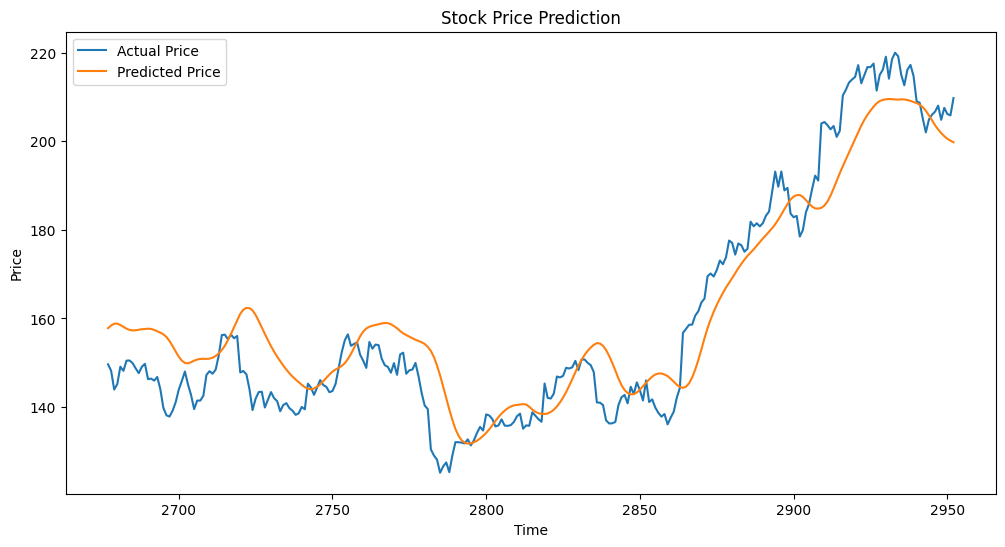

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
predicted_prices = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()

actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

plt.figure(figsize=(12, 6))
#plt.plot(range(len(y_train)), scaler.inverse_transform(y_train.reshape(-1, 1)), label='Train Data')
plt.plot(range(len(y_train), len(y_train) + len(actual_prices)), actual_prices, label='Actual Price')
plt.plot(range(len(y_train), len(y_train) + len(predicted_prices)), predicted_prices, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# CNN Model


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(look_back, barclays_scaled.shape[1])))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())

cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(1))

cnn_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 49, 64)            1344      
                                                                 
 max_pooling1d_18 (MaxPooli  (None, 24, 64)            0         
 ng1D)                                                           
                                                                 
 flatten_13 (Flatten)        (None, 1536)              0         
                                                                 
 dense_35 (Dense)            (None, 32)                49184     
                                                                 
 dense_36 (Dense)            (None, 1)                 33        
                                                                 
Total params: 50561 (197.50 KB)
Trainable params: 50561 (197.50 KB)
Non-trainable params: 0 (0.00 Byte)
_______________

In [ ]:
cnn_model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])


cnn_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
76/76 [==============================] - 2s 7ms/step - loss: 0.0222 - accuracy: 4.1511e-04 - val_loss: 0.0077 - val_accuracy: 0.0000e+00
Epoch 2/10
76/76 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 4.1511e-04 - val_loss: 0.0060 - val_accuracy: 0.0000e+00
Epoch 3/10
76/76 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 4.1511e-04 - val_loss: 0.0064 - val_accuracy: 0.0000e+00
Epoch 4/10
76/76 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 4.1511e-04 - val_loss: 0.0072 - val_accuracy: 0.0000e+00
Epoch 5/10
76/76 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 4.1511e-04 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 6/10
76/76 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 4.1511e-04 - val_loss: 0.0045 - val_accuracy: 0.0000e+00
Epoch 7/10
76/76 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 4.1511e-04 - val_loss

In [ ]:
predictions = cnn_model.predict(X_test)

9/9 [==============================] - 0s 7ms/step


In [ ]:

predicted_prices = scaler.inverse_transform(predictions.flatten().reshape(-1, 1)).flatten()
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

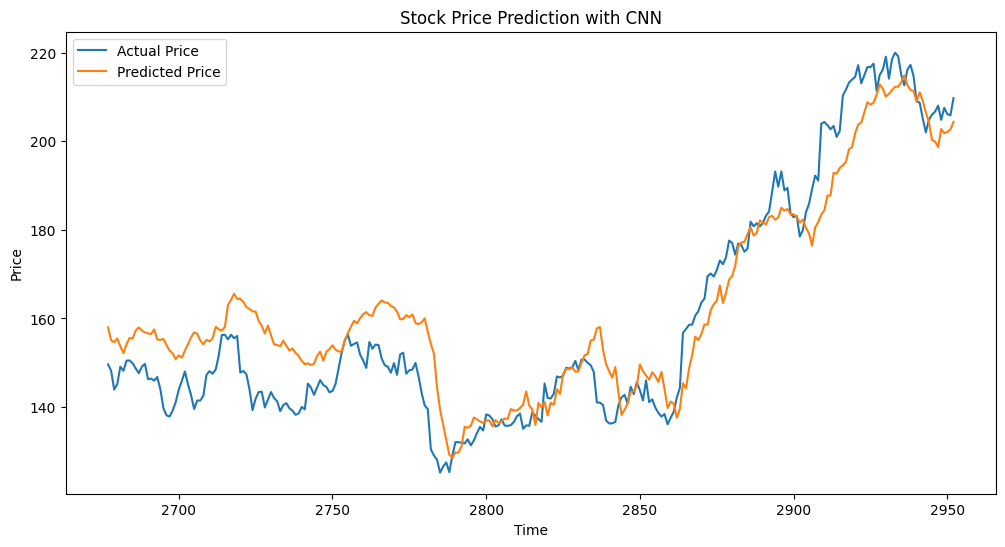

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
#plt.plot(range(len(y_train)), scaler.inverse_transform(y_train.reshape(-1, 1)), label='Train Data')
plt.plot(range(len(y_train), len(y_train) + len(actual_prices)), actual_prices, label='Actual Price')
plt.plot(range(len(y_train), len(y_train) + len(predicted_prices)), predicted_prices, label='Predicted Price')
plt.title('Stock Price Prediction with CNN')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


# XGBoost model

In [ ]:
# # Initialize the XGBoost regressor
# from xgboost import XGBRegressor
# model = XGBRegressor(n_estimators=500, learning_rate=0.02, max_depth=10, objective='reg:squarederror')

In [ ]:
# Initialize the XGBoost regressor with custom hyperparameters
XGB_model = XGBRegressor(
    n_estimators=500,       # Number of boosting rounds
    learning_rate=0.01,      # Step size shrinkage
    max_depth=5,             # Maximum depth of a tree
    min_child_weight=1,      # Minimum sum of instance weight (hessian) needed in a child
    gamma=0,                 # Minimum loss reduction required to make a further partition
    subsample=0.6,           # Fraction of training data to use for fitting each base learner
    colsample_bytree=0.6,    # Fraction of features to consider for each tree
    reg_alpha=0.001,         # L1 regularization term on weights
    reg_lambda=0.001,            # L2 regularization term on weights
    objective='reg:squarederror',  # Learning objective
    eval_metric='rmse'       # Evaluation metric
)

In [ ]:
# Train the model
XGB_model.fit(x_train_boost, y_train_boost, eval_set=[(X_test_boost, y_test_boost)], verbose=True)



[0]	validation_0-rmse:0.34033
[1]	validation_0-rmse:0.33752
[2]	validation_0-rmse:0.33490
[3]	validation_0-rmse:0.33214
[4]	validation_0-rmse:0.32956
[5]	validation_0-rmse:0.32701
[6]	validation_0-rmse:0.32448
[7]	validation_0-rmse:0.32199
[8]	validation_0-rmse:0.31946
[9]	validation_0-rmse:0.31704
[10]	validation_0-rmse:0.31461
[11]	validation_0-rmse:0.31220
[12]	validation_0-rmse:0.30975
[13]	validation_0-rmse:0.30729
[14]	validation_0-rmse:0.30488
[15]	validation_0-rmse:0.30256
[16]	validation_0-rmse:0.30024
[17]	validation_0-rmse:0.29792
[18]	validation_0-rmse:0.29570
[19]	validation_0-rmse:0.29325
[20]	validation_0-rmse:0.29101
[21]	validation_0-rmse:0.28872
[22]	validation_0-rmse:0.28650
[23]	validation_0-rmse:0.28432
[24]	validation_0-rmse:0.28225
[25]	validation_0-rmse:0.28000
[26]	validation_0-rmse:0.27778
[27]	validation_0-rmse:0.27579
[28]	validation_0-rmse:0.27381
[29]	validation_0-rmse:0.27185
[30]	validation_0-rmse:0.26990
[31]	validation_0-rmse:0.26789
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Make predictions
predictions = XGB_model.predict(X_test_boost)

In [ ]:
predicted_prices = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
actual_prices = scaler.inverse_transform(y_test_boost.reshape(-1, 1)).flatten()


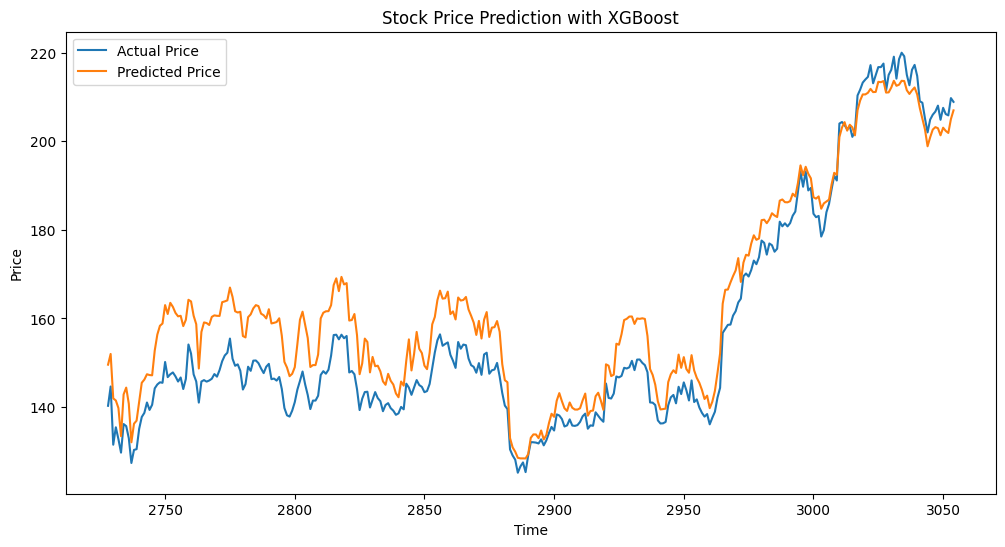

In [ ]:
plt.figure(figsize=(12, 6))
#plt.plot(range(len(y_train_boost)), scaler.inverse_transform(y_train_boost.reshape(-1, 1)), label='Train Data')
plt.plot(range(len(y_train_boost), len(y_train_boost) + len(actual_prices)), actual_prices, label='Actual Price')
plt.plot(range(len(y_train_boost), len(y_train_boost) + len(predicted_prices)), predicted_prices, label='Predicted Price')
plt.title('Stock Price Prediction with XGBoost')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
